# Data Generation for the Rummy Pool

In [1]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl



number_of_players_in_pool = int(input('How many players do you want to have in the pool: '))
bet_multiplier_options = [0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200]
min_amount = [4, 8, 20, 40, 80, 160, 240, 400, 800, 1600, 3200, 6400, 10000, 16000]
bet_min = dict(zip(bet_multiplier_options, min_amount))
print(bet_min)

bet_multiplier_input = float(input("How much do you want the bet amount multiplier to be?\nChoose from the options - (0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200): "))
print(f"You have chosen the bet amount multiplier to be: {bet_multiplier_input}")

for key in bet_min.keys():
    if key == bet_multiplier_input:
        min_amt_required = float(bet_min[key])
        print("Minimum amount is:", min_amt_required)
        print(type(min_amt_required))
    else:
        continue
        print("Sorry, you have chosen a wrong bet amount multiplier, please try again by chosing one from the options mentioned here (0.05, 0.1, 0.25, 0.5, 1, 2, 3,5, 10, 20, 40, 80, 125, 200): ")

totalPlayers = {}
for i in range(number_of_players_in_pool):
    x = ''.join([random.choice(string.ascii_uppercase) for k in range(4)]).title()
    y = round(random.uniform(min_amt_required, (min_amt_required + 30)), 3)
    totalPlayers[x] = y

Sum = sum(totalPlayers.values())
print(f"The total amount involved in this pool is: {Sum}")
total_players_df = pd.DataFrame(totalPlayers.items(), columns=['Name', 'Balance in Rupees'])
print("The below table shows all the players in the pool along with their account balances.")
print(total_players_df)

total_amount_credited_to_app = 0
percentage_deduction = 15 / 100



matches_data = []

def matches():
    global total_amount_credited_to_app
    global matches_data

    eligible_players = {k: v for k, v in totalPlayers.items() if v >= min_amt_required}

    if len(eligible_players) < 2:
        print("Insufficient eligible players for a match.")
        return

    p1 = random.choice(list(eligible_players.items()))
    del eligible_players[p1[0]]
    p2 = random.choice(list(eligible_players.items()))

    match_data = {
        'Match Number':'',
        'Player 1': p1[0],
        'Player 2': p2[0],
        'Loser': '',
        'Winner': '',
        'Points Lost by Loser': '',
        'Amount Lost by Loser': '',
        'Amount Remaining for Loser': '',
        'Amount to be Credited to App': '',
        'Total Amount Earned by App': '',
        'Amount Won by Winner': '',
        'Amount Remaining for Winner': ''
    }
    
    match_data['Match Number'] = len(matches_data) + 1
    
    remaining_balances = totalPlayers.copy()
    for player, balance in remaining_balances.items():
        if player == match_data['Loser']:
            match_data[player] = totalPlayers[player] - (random.randint(2, 80) * bet_multiplier_input)
        elif player == match_data['Winner']:
            match_data[player] = totalPlayers[player] + (
                        totalPlayers[match_data['Loser']] * bet_multiplier_input * (100 - percentage_deduction) / 100)
        else:
            match_data[player] = balance
    
    for players, remaining_bal in totalPlayers.items():
        if players == match_data['Loser']:
            match_data[players] = amount_remaining_for_loser
        elif players == match_data['Winner']:
            match_data[players] == amount_remaining_for_winner
        else:
            match_data[players] == remaining_bal
    
    match_data['Loser'] = p1[0] if random.choice([p1, p2]) == p2 else p2[0]
    match_data['Winner'] = p1[0] if match_data['Loser'] == p2[0] else p2[0]

    points_lost = random.choice(range(2, 80))
    amount_deducted_from_loser = round(points_lost * bet_multiplier_input, 3)
    amount_remaining_for_loser = round(totalPlayers[match_data['Loser']] - amount_deducted_from_loser, 3)
    amount_credited_to_app = round(amount_deducted_from_loser * percentage_deduction, 3)
    total_amount_credited_to_app += amount_credited_to_app

    match_data['Points Lost by Loser'] = points_lost
    match_data['Amount Lost by Loser'] = amount_deducted_from_loser
    match_data['Amount Remaining for Loser'] = amount_remaining_for_loser
    match_data['Amount to be Credited to App'] = amount_credited_to_app
    match_data['Total Amount Earned by App'] = total_amount_credited_to_app

    amount_earnt_by_winner = round(amount_deducted_from_loser - amount_credited_to_app, 3)
    amount_remaining_for_winner = round(totalPlayers[match_data['Winner']] + amount_earnt_by_winner, 3)

    match_data['Amount Won by Winner'] = amount_earnt_by_winner
    match_data['Amount Remaining for Winner'] = amount_remaining_for_winner

    totalPlayers[match_data['Loser']] = amount_remaining_for_loser
    totalPlayers[match_data['Winner']] = amount_remaining_for_winner
    
    
    print(f"In this match we have : \n {p1} v/s {p2}")
    print(f'Where player 1 is : {p1}')
    print(f'and player 2 is : {p2}')
    
    print (f"The Winner is : {match_data['Winner']} ")
    print(f"And the loser is : {match_data['Loser']}  ")
    
    print(f"Points lost by loser - {match_data['Loser']}  is : \n {points_lost}")
    print(f"Amount lost by loser - {match_data['Loser']}  is : \n {amount_deducted_from_loser}")
    print (f"Amount remaining in the loser {match_data['Loser']}'s account is : \n {amount_remaining_for_loser}")
    (f"Amount won by winner {match_data['Winner']} is : \n {amount_earnt_by_winner}")
    print(f"Amount remaining in the winner {match_data['Winner']}'s account is : \n {amount_remaining_for_winner}")
    
    print(f"Amount to be credited to app is : \n {amount_credited_to_app}")
    print(f"Total amount earnt by app is : \n {total_amount_credited_to_app}")
    
    closing_balance_of_match = pd.DataFrame(totalPlayers.items(), columns=['Name', "Balance"])
    closing_balance_of_match.loc[closing_balance_of_match['Name'] == match_data['Loser'], 'Balance'] = amount_remaining_for_loser
    closing_balance_of_match.loc[closing_balance_of_match['Name'] == match_data['Winner'], 'Balance'] = amount_remaining_for_winner
    print(f"The closing balance of this match is \n {closing_balance_of_match}")

   
    matches_data.append(match_data)

counter = len(totalPlayers)
print(counter)
match = 0

while counter > 1:
    matches()
    match += 1
    print(f"Match {match} concluded")
    print("-" * 120)
    counter = sum(1 for amount in totalPlayers.values() if amount >= min_amt_required)

matches_df = pd.DataFrame(matches_data)



How many players do you want to have in the pool: 10
{0.05: 4, 0.1: 8, 0.25: 20, 0.5: 40, 1: 80, 2: 160, 3: 240, 5: 400, 10: 800, 20: 1600, 40: 3200, 80: 6400, 125: 10000, 200: 16000}
How much do you want the bet amount multiplier to be?
Choose from the options - (0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200): .05
You have chosen the bet amount multiplier to be: 0.05
Minimum amount is: 4.0
<class 'float'>
The total amount involved in this pool is: 207.439
The below table shows all the players in the pool along with their account balances.
   Name  Balance in Rupees
0  Ahdz             25.932
1  Hufo             14.419
2  Wyqv             15.783
3  Ypjc             30.808
4  Smhc             26.246
5  Zwdg             33.258
6  Jiub              5.286
7  Nljh             19.124
8  Lcbh             18.654
9  Owwq             17.929
10
In this match we have : 
 ('Hufo', 14.419) v/s ('Owwq', 17.929)
Where player 1 is : ('Hufo', 14.419)
and player 2 is : ('Owwq', 17.929)
The W

In [2]:
list(totalPlayers.keys())

['Ahdz',
 'Hufo',
 'Wyqv',
 'Ypjc',
 'Smhc',
 'Zwdg',
 'Jiub',
 'Nljh',
 'Lcbh',
 'Owwq']

In [3]:
matches_df

,Match Number,Player 1,Player 2,Loser,Winner,Points Lost by Loser,Amount Lost by Loser,Amount Remaining for Loser,Amount to be Credited to App,Total Amount Earned by App,...,Ahdz,Hufo,Wyqv,Ypjc,Smhc,Zwdg,Jiub,Nljh,Lcbh,Owwq
0,1,Hufo,Owwq,Owwq,Hufo,68,3.40,14.529,0.510,0.510,...,25.932,14.419,15.783,30.808,26.246,33.258,5.286,19.124,18.654,17.929
1,2,Ahdz,Wyqv,Wyqv,Ahdz,32,1.60,14.183,0.240,0.750,...,25.932,17.309,15.783,30.808,26.246,33.258,5.286,19.124,18.654,14.529
2,3,Hufo,Ypjc,Ypjc,Hufo,67,3.35,27.458,0.502,1.252,...,27.292,17.309,14.183,30.808,26.246,33.258,5.286,19.124,18.654,14.529
3,4,Hufo,Ahdz,Ahdz,Hufo,21,1.05,26.242,0.158,1.410,...,27.292,20.157,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529
4,5,Smhc,Jiub,Jiub,Smhc,47,2.35,2.936,0.352,1.762,...,26.242,21.049,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,365,Ahdz,Hufo,Hufo,Ahdz,8,0.40,16.744,0.060,108.530,...,58.479,17.144,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
365,366,Hufo,Ahdz,Hufo,Ahdz,64,3.20,13.544,0.480,109.010,...,58.819,16.744,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
366,367,Hufo,Ahdz,Hufo,Ahdz,71,3.55,9.994,0.532,109.542,...,61.539,13.544,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
367,368,Ahdz,Hufo,Hufo,Ahdz,56,2.80,7.194,0.420,109.962,...,64.557,9.994,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991


In [4]:
matches_df.to_excel('Rummy.xlsx', index=False, engine='openpyxl')

In [5]:
App = matches_df['Total Amount Earned by App']
col_names = matches_df.columns

### Visualization of player's and app's flow of balances

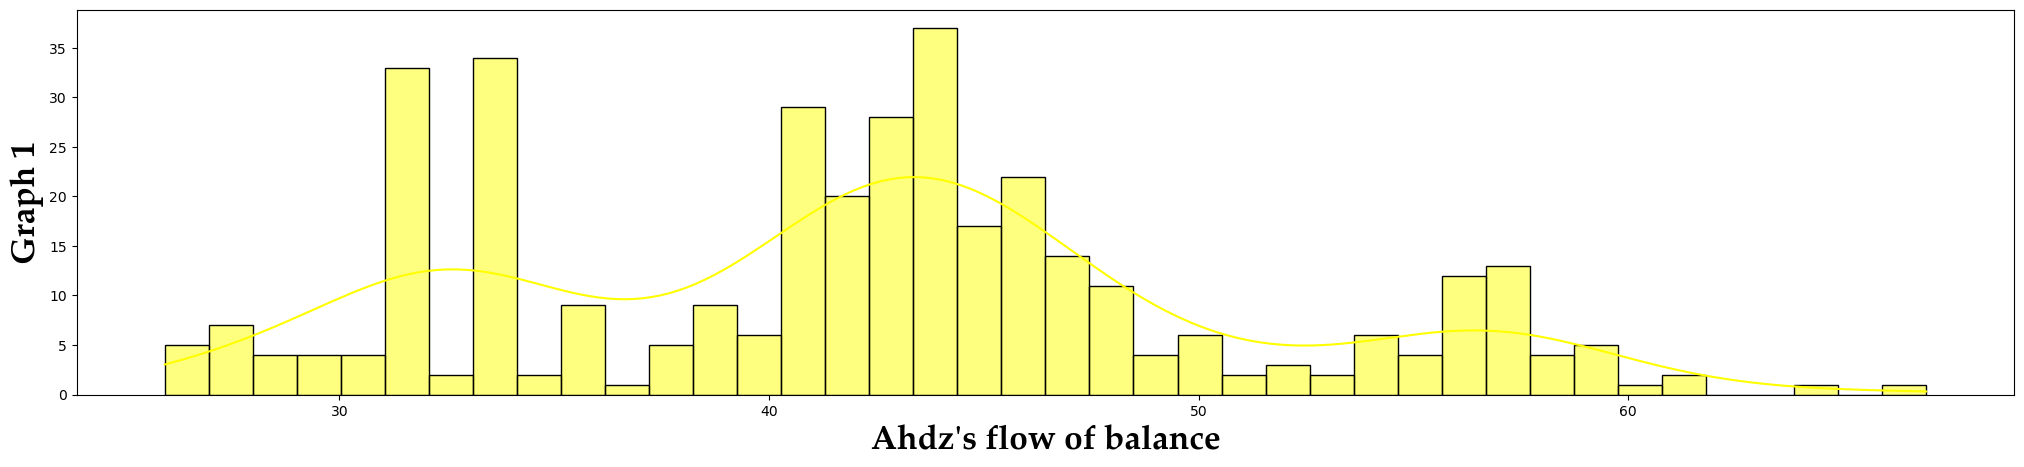

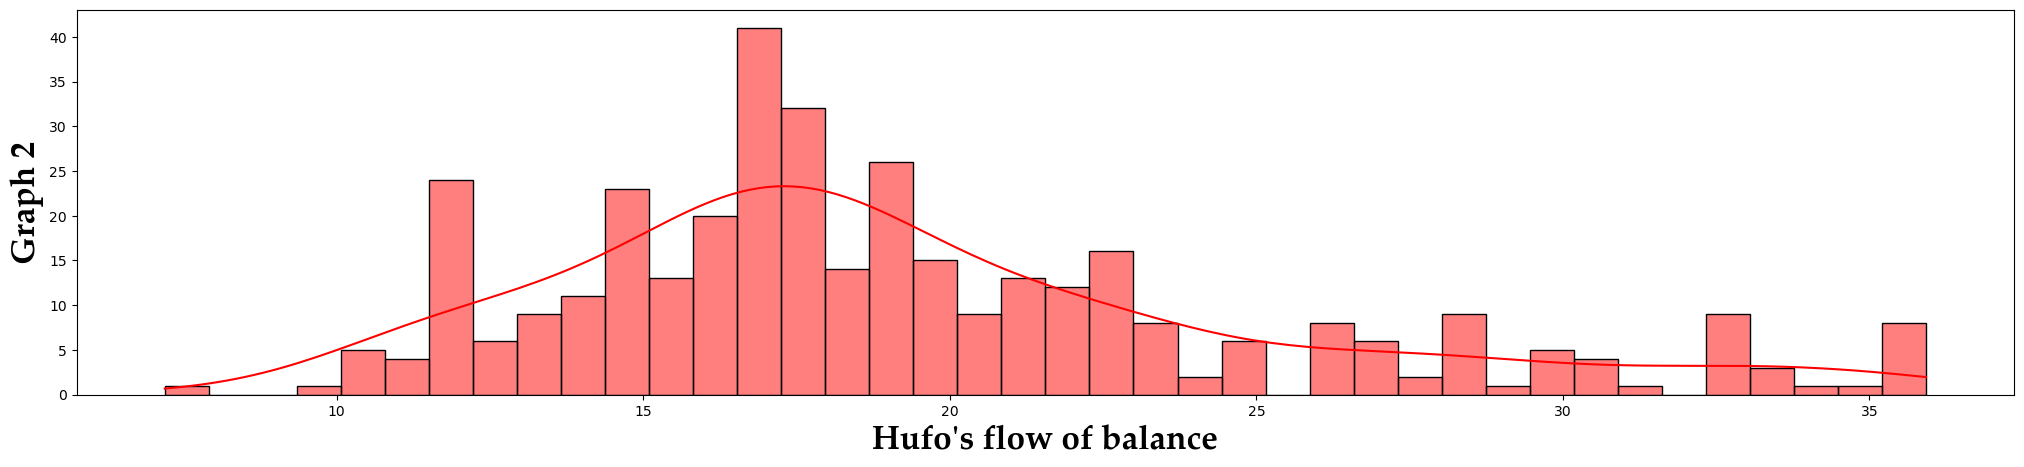

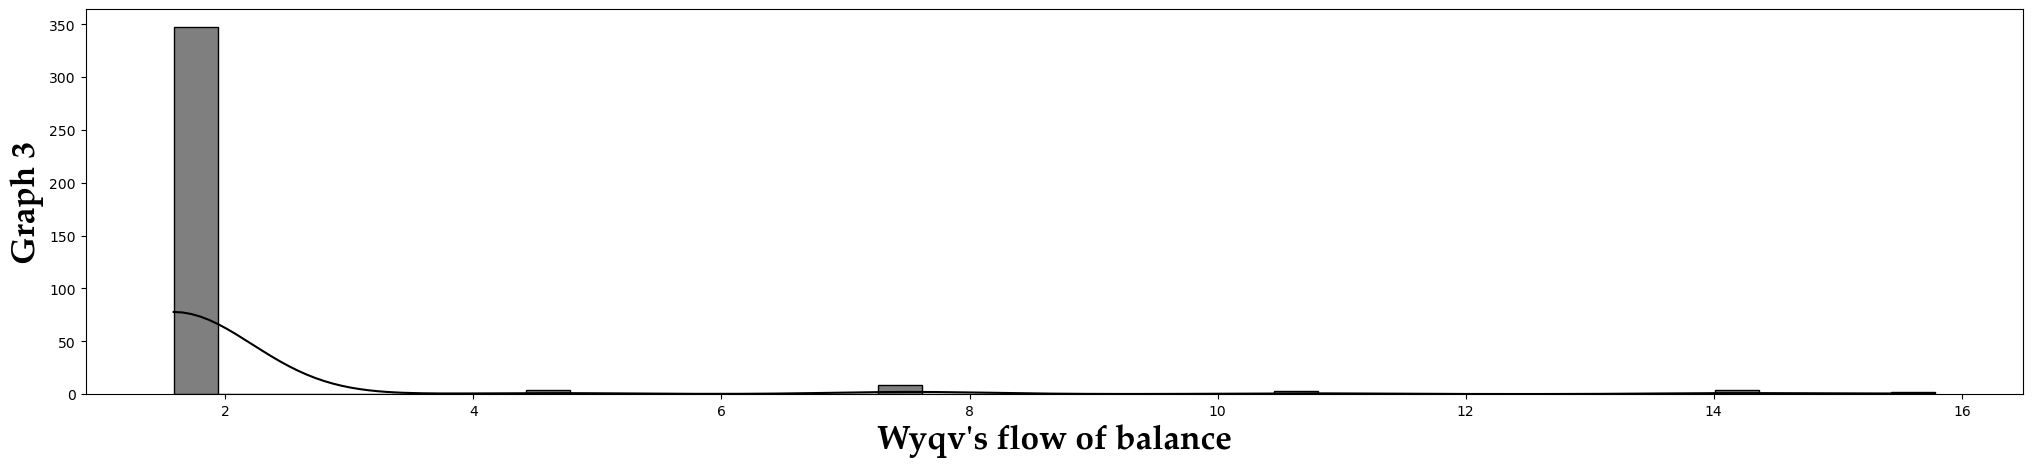

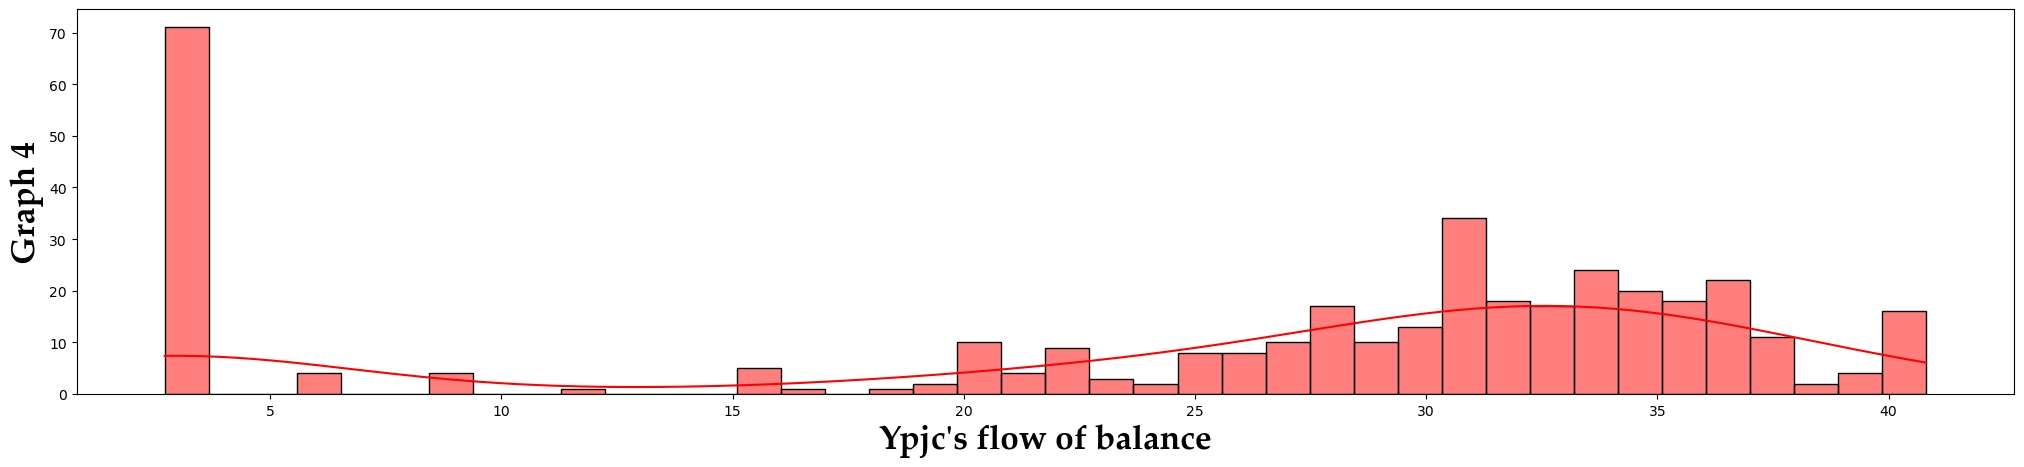

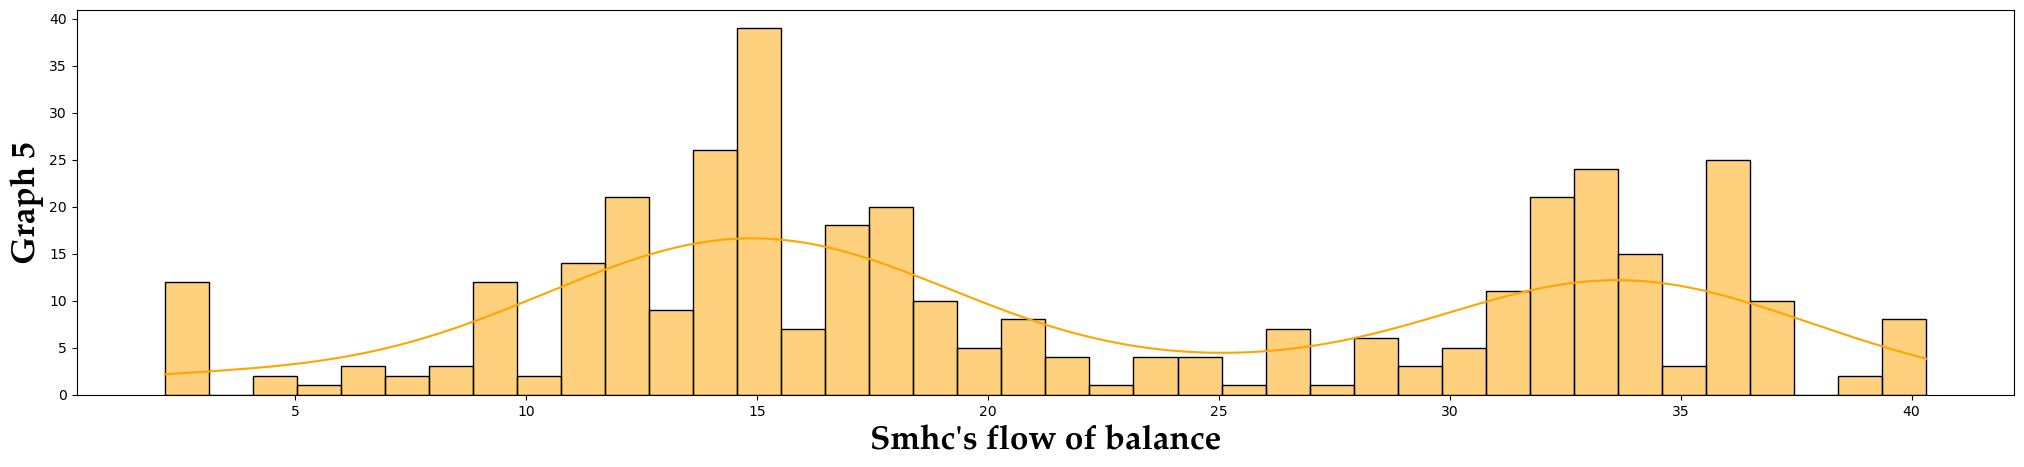

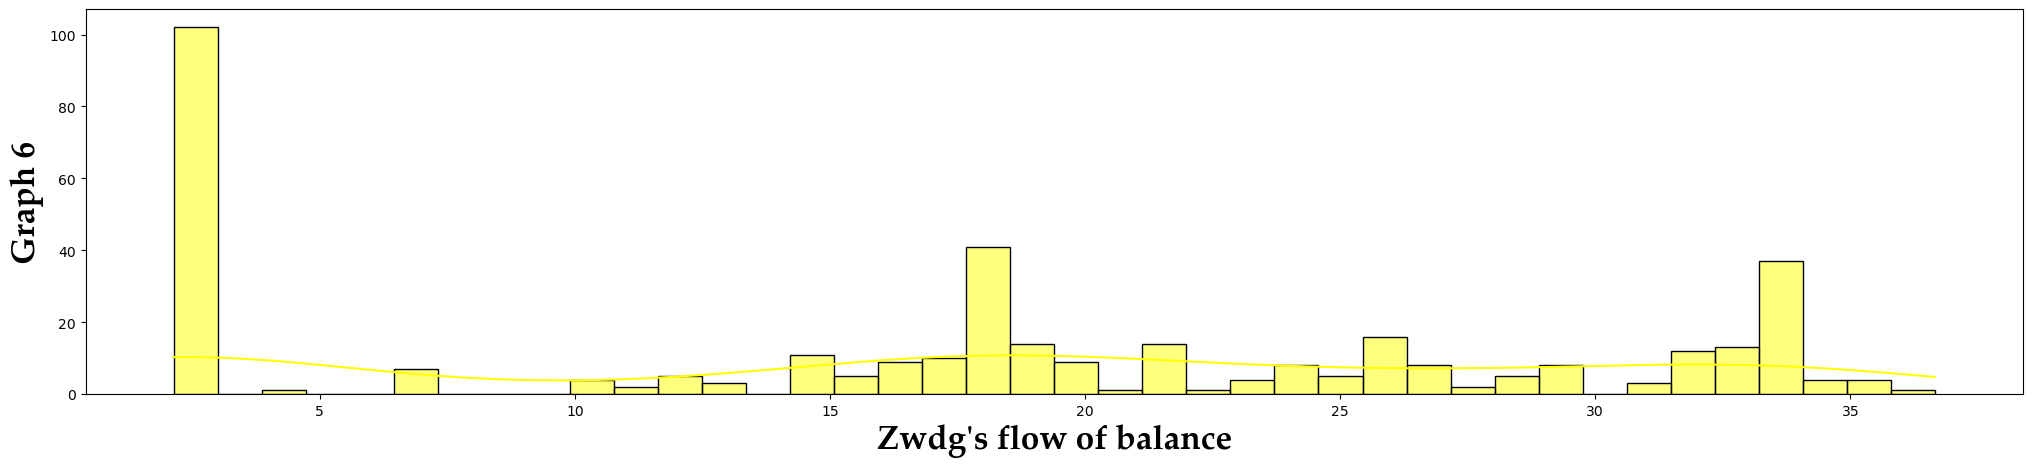

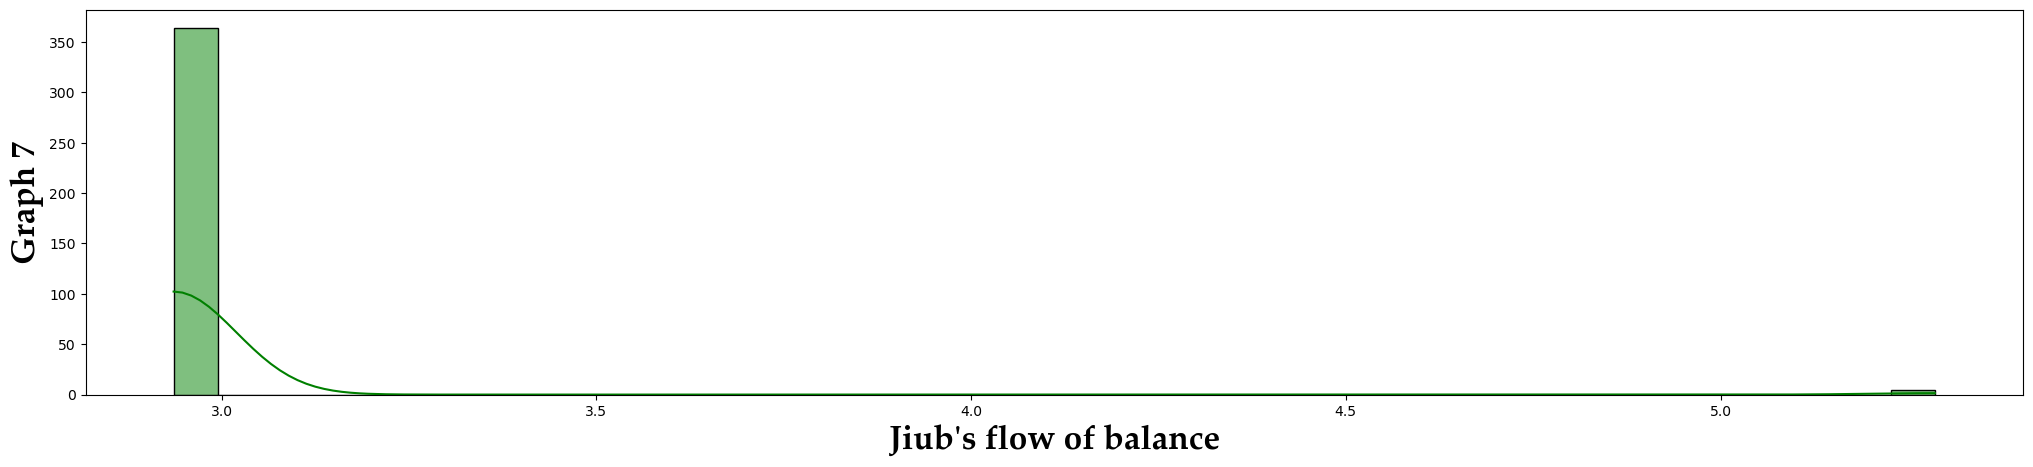

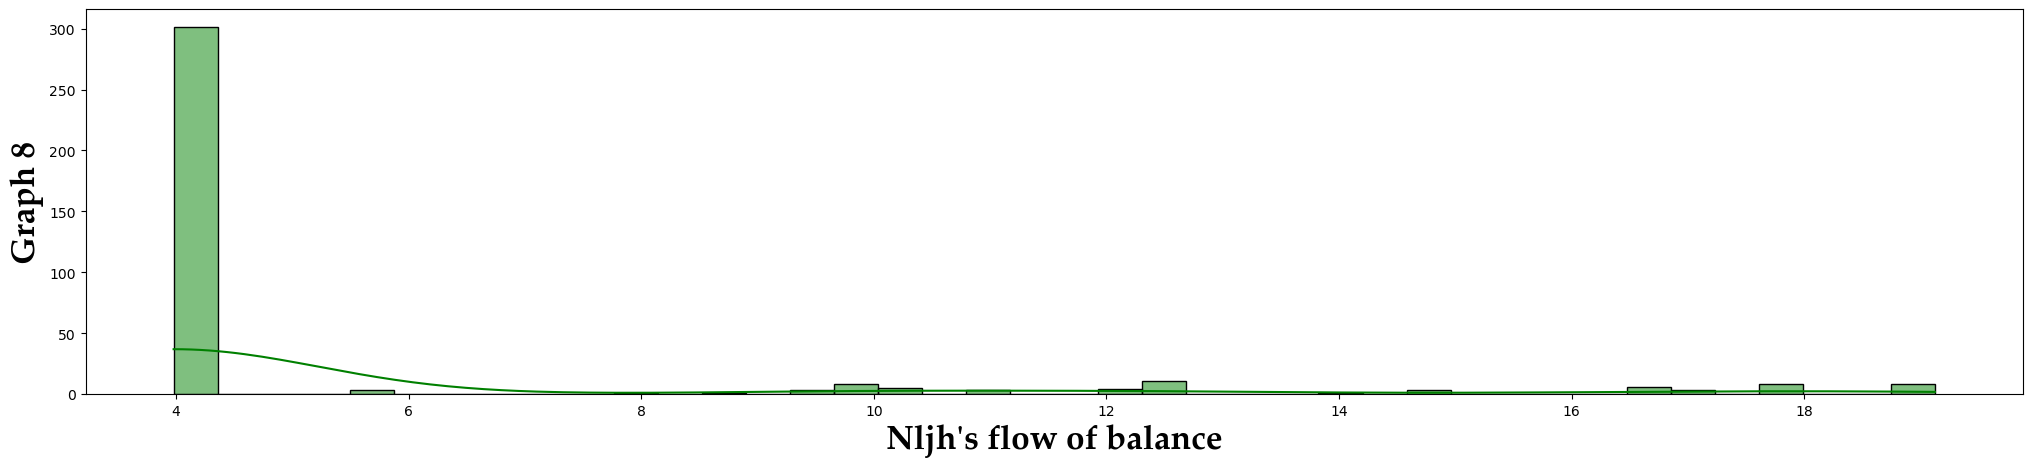

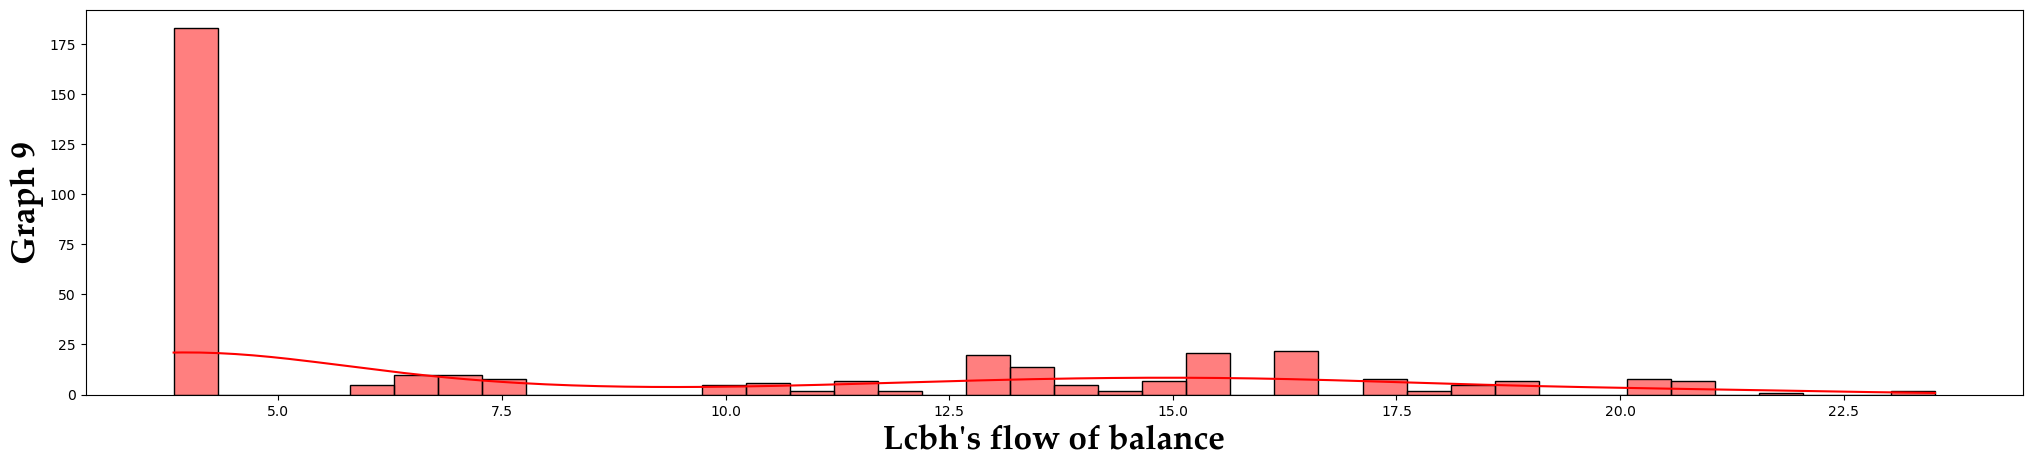

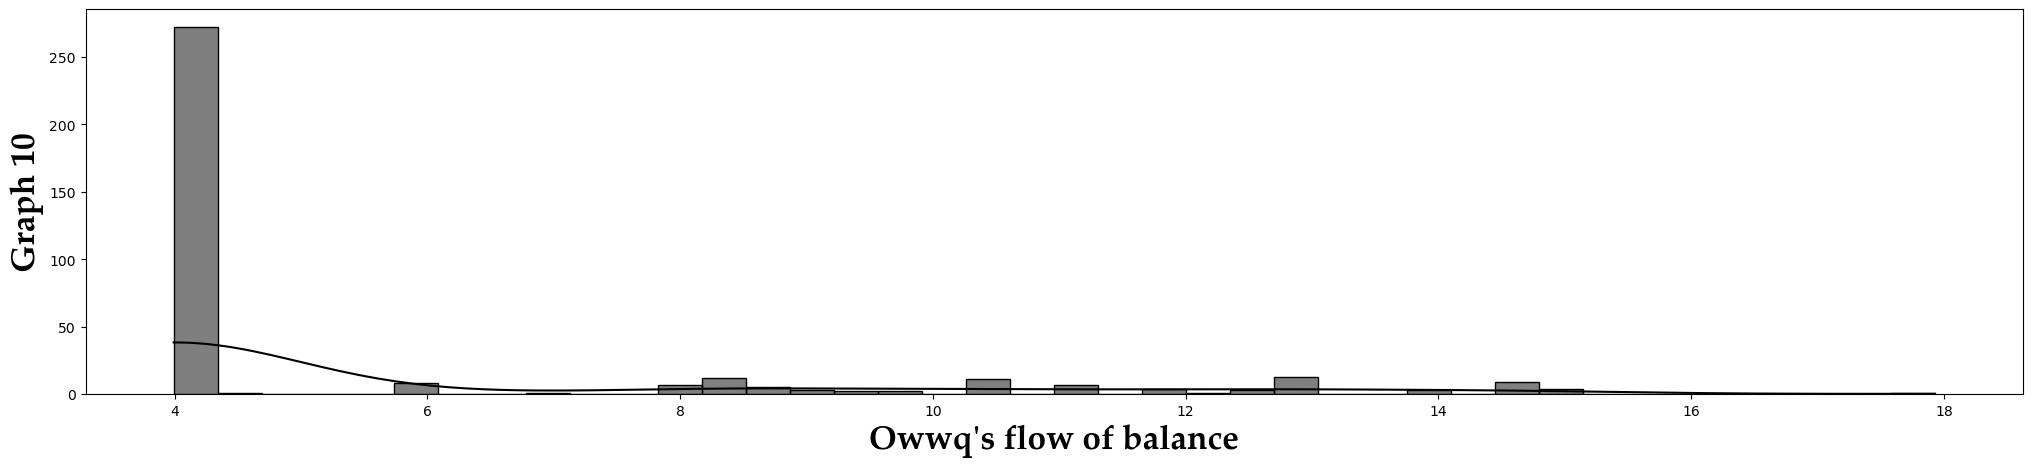

In [6]:
font = {'size':24, 'family':'Palatino Linotype', 'weight':'bold'}
for i in range(number_of_players_in_pool):
    plt.figure(figsize=(25,5))
    plott = sns.histplot(matches_df.iloc[:,12+i], kde=True, bins=40, color= random.choice(['r', 'g','b','yellow','black','orange']))
    plt.xlabel(f"{col_names[12+i]}'s flow of balance", fontdict=font)
    plt.ylabel(f"Graph {i+1}", fontdict=font)
    plt.show()
    i += 1

Text(0, 0.5, 'Count')

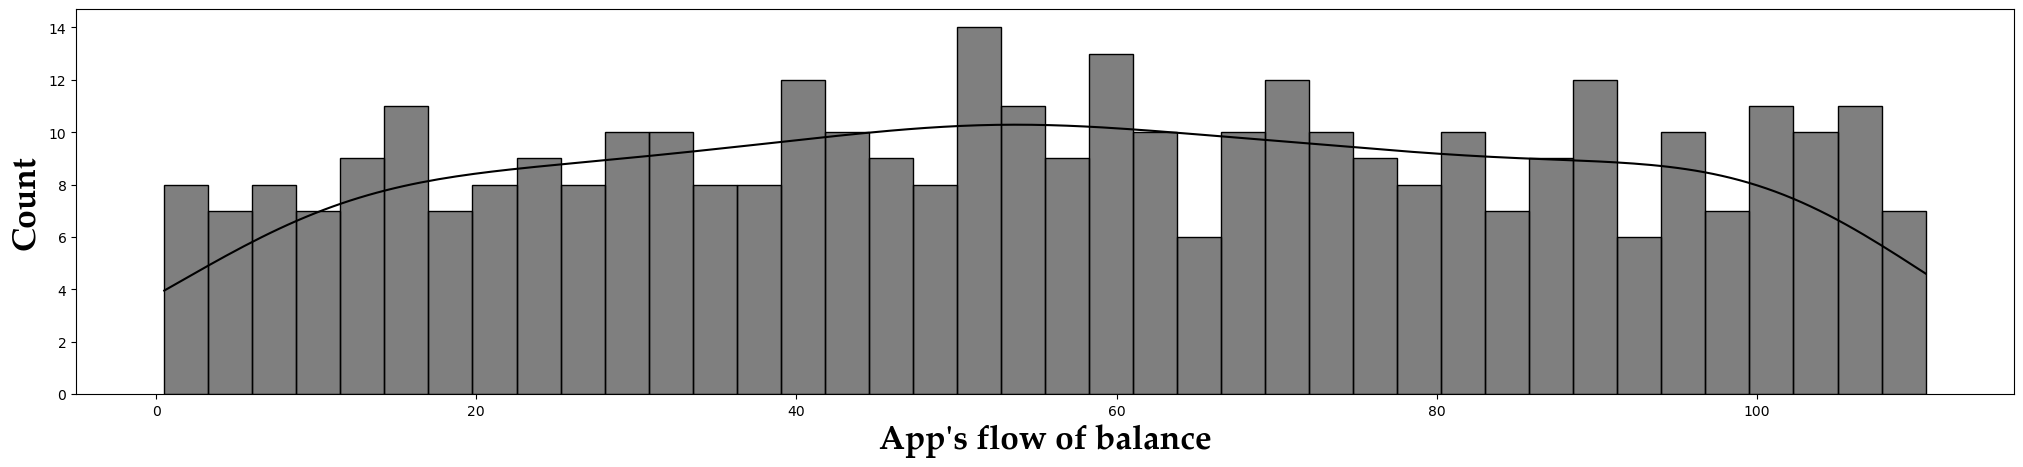

In [7]:
plt.figure(figsize=(25,5))
sns.histplot(matches_df.iloc[:,9], kde=True, bins=40, color='black')
plt.xlabel("App's flow of balance", fontdict=font)
plt.ylabel("Count", fontdict=font)

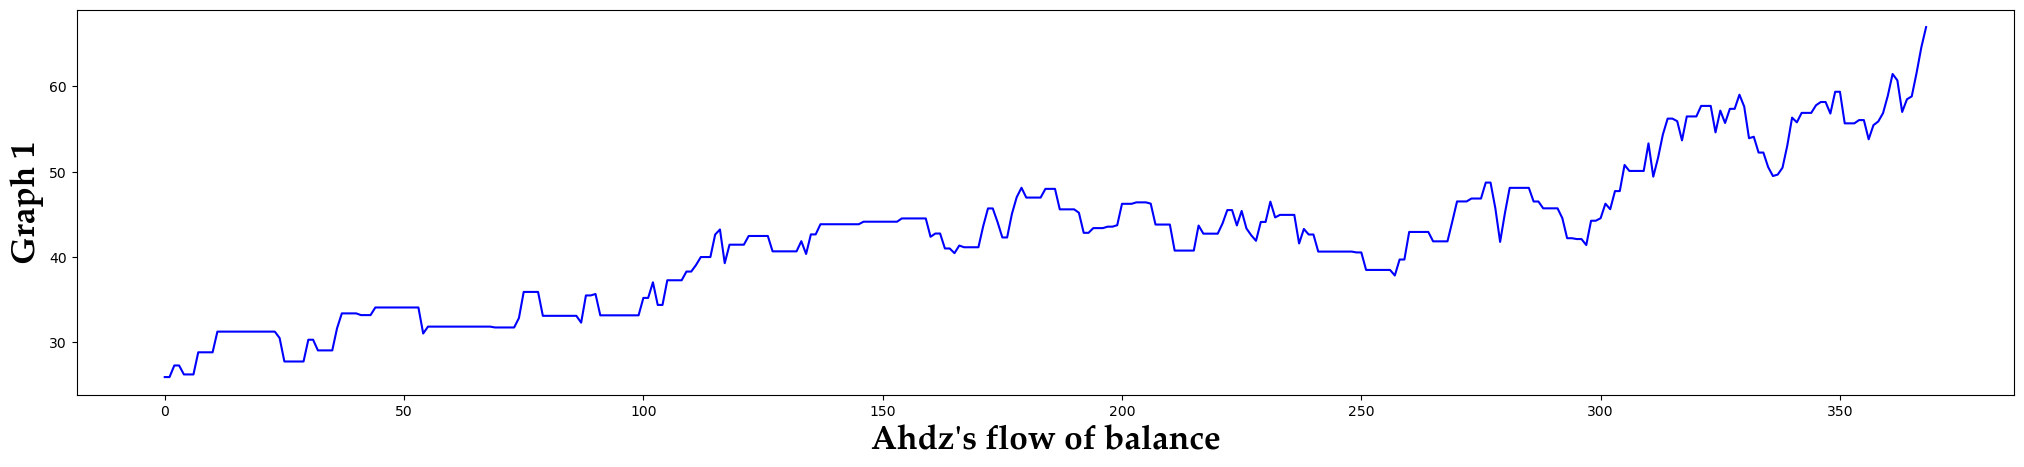

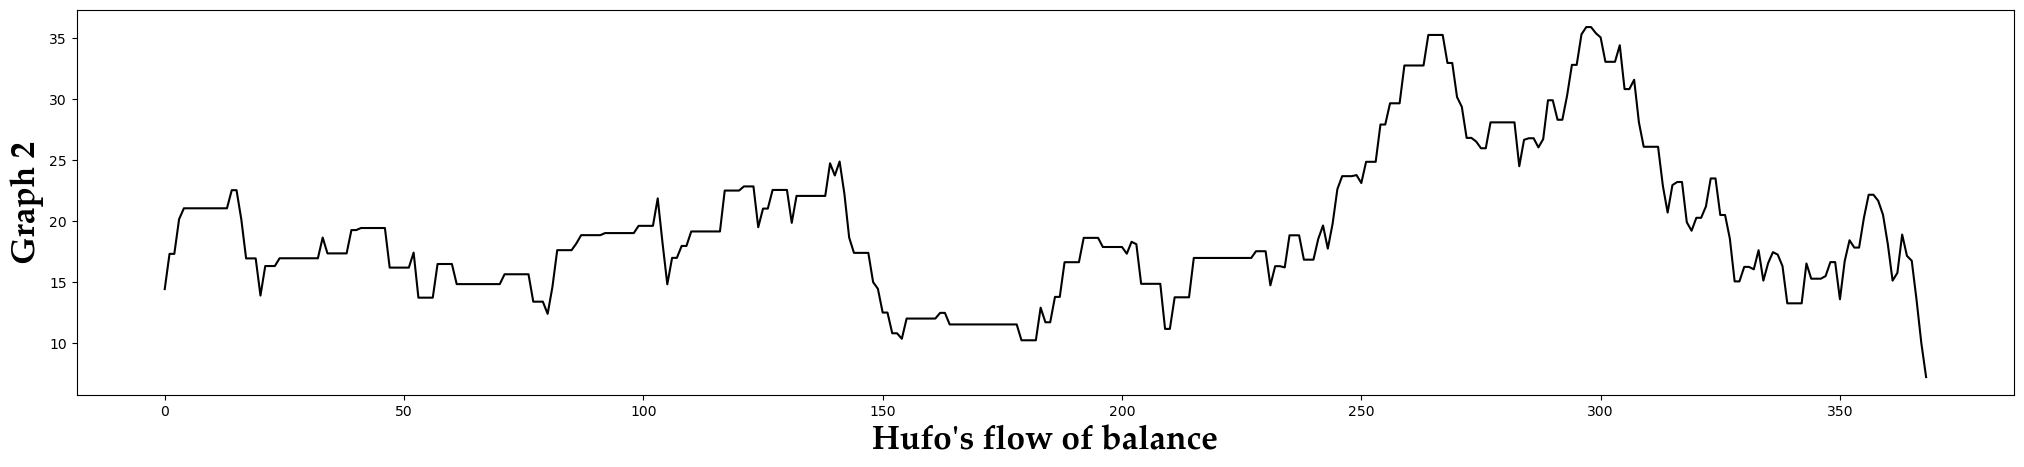

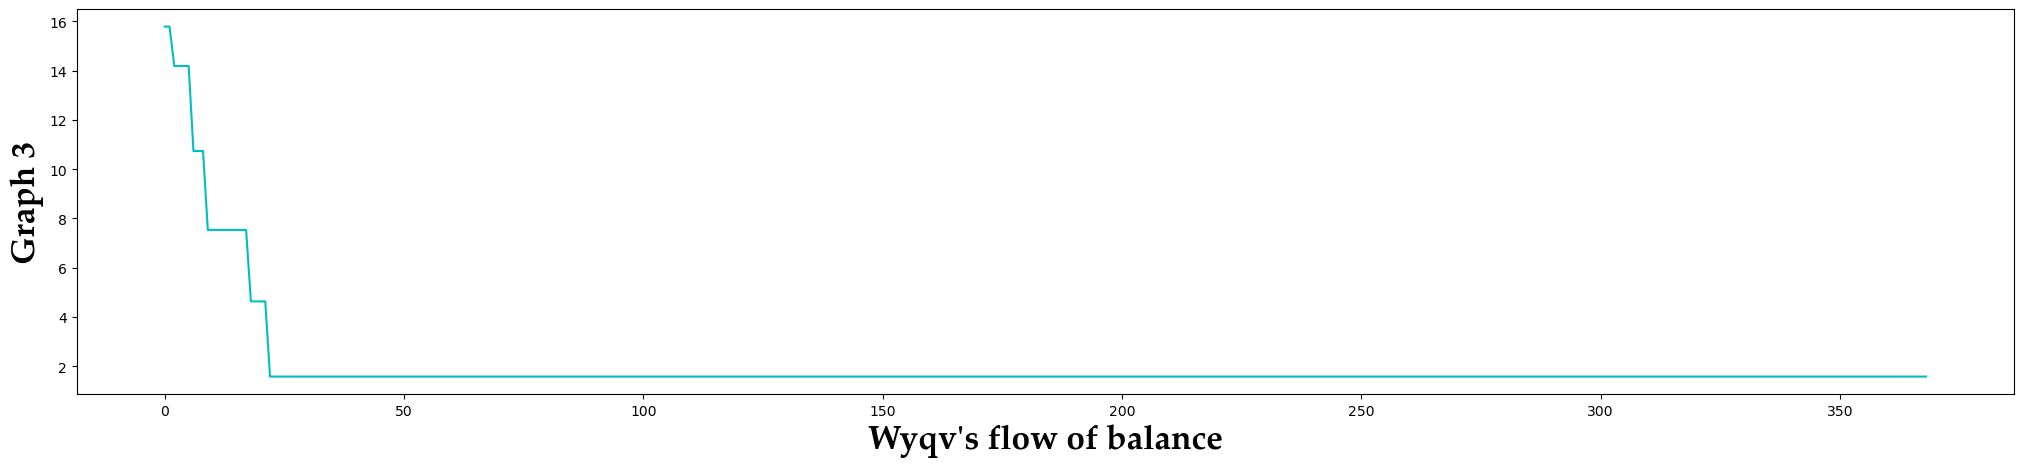

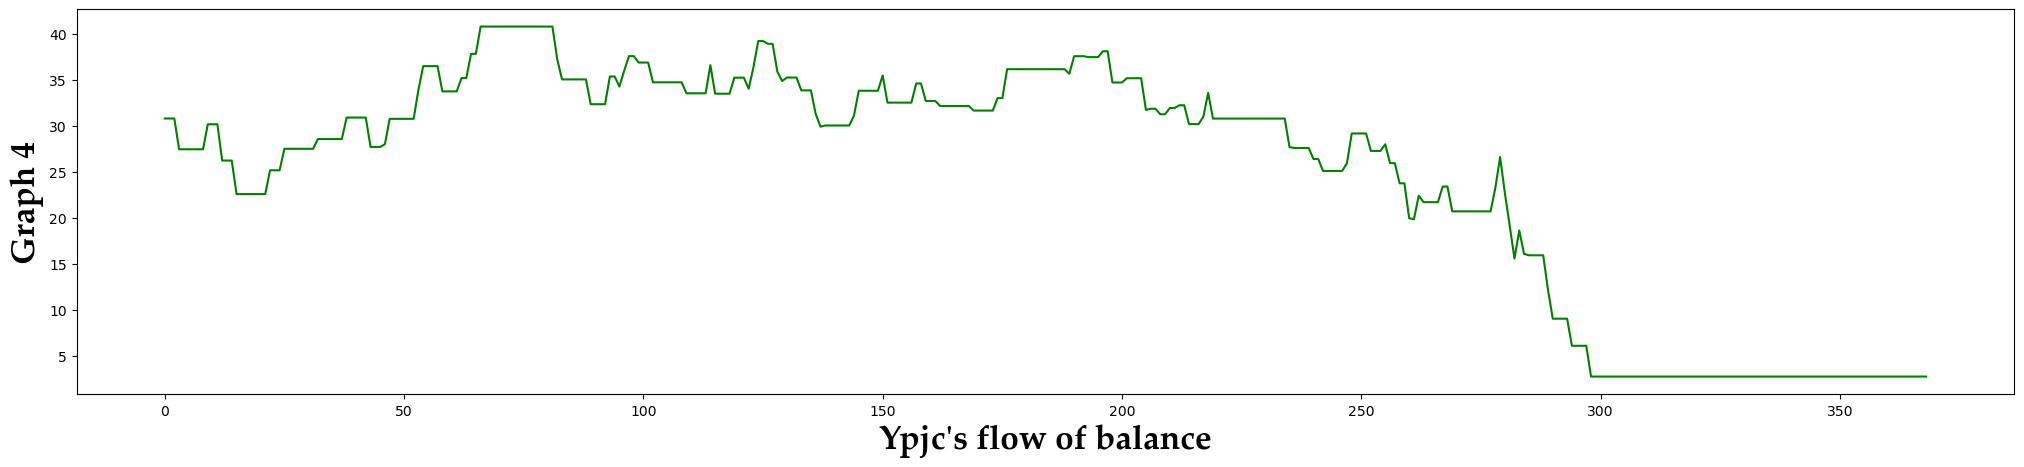

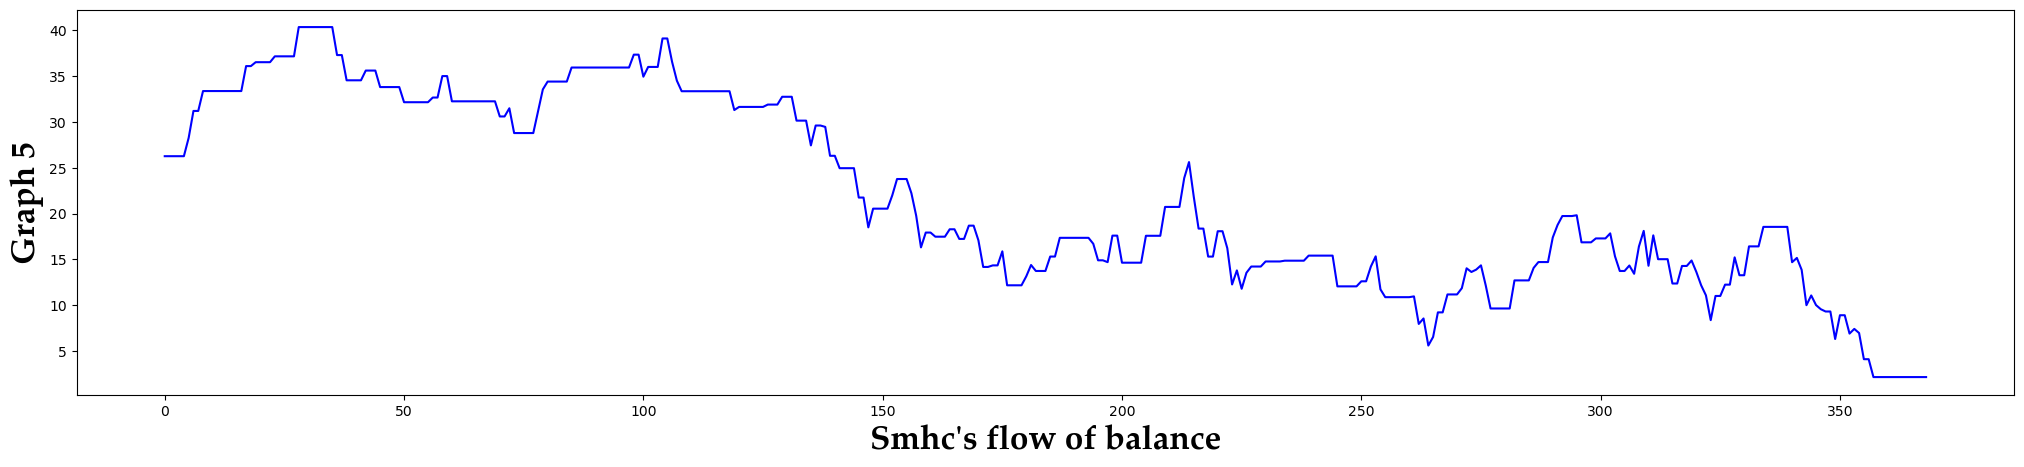

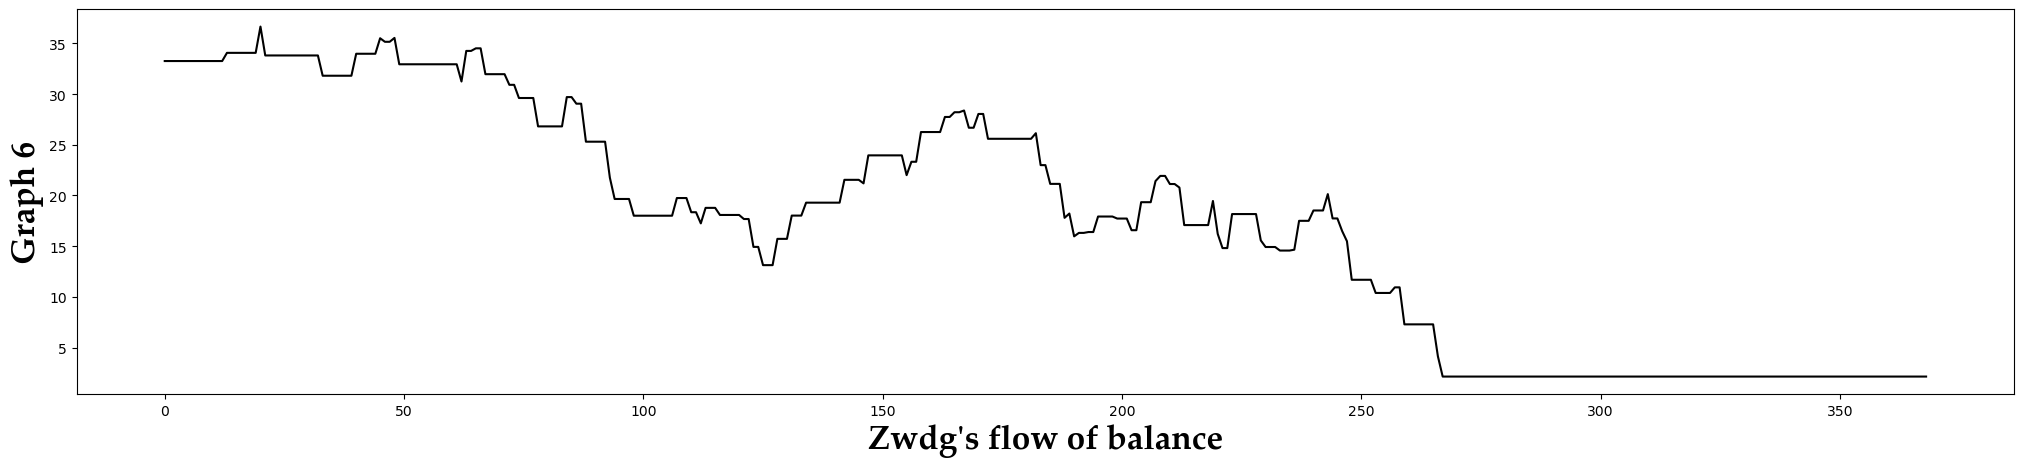

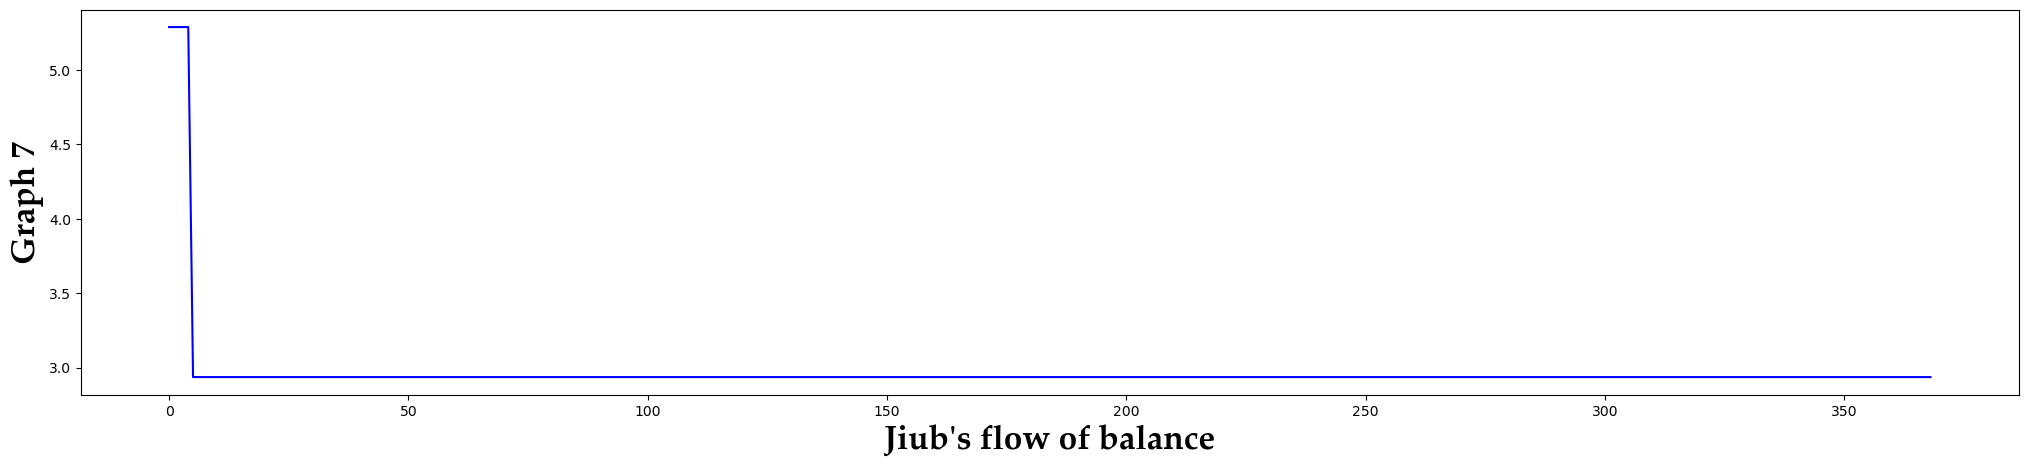

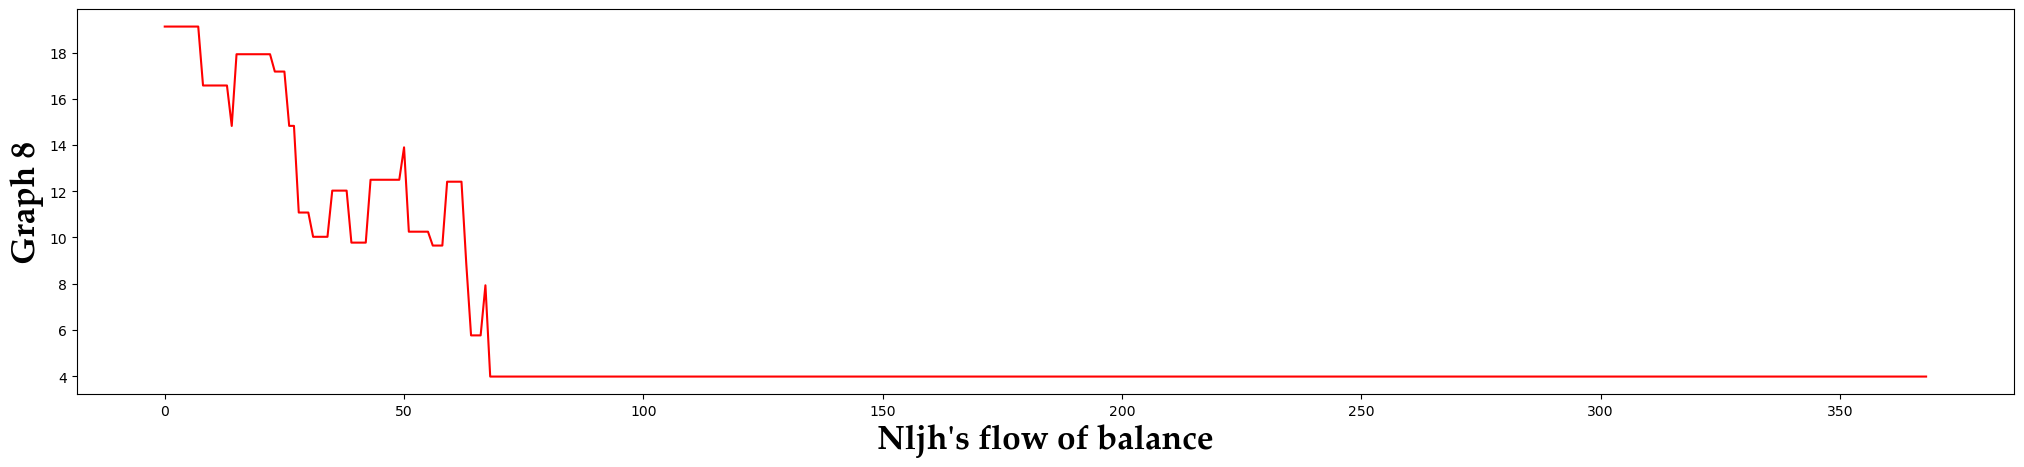

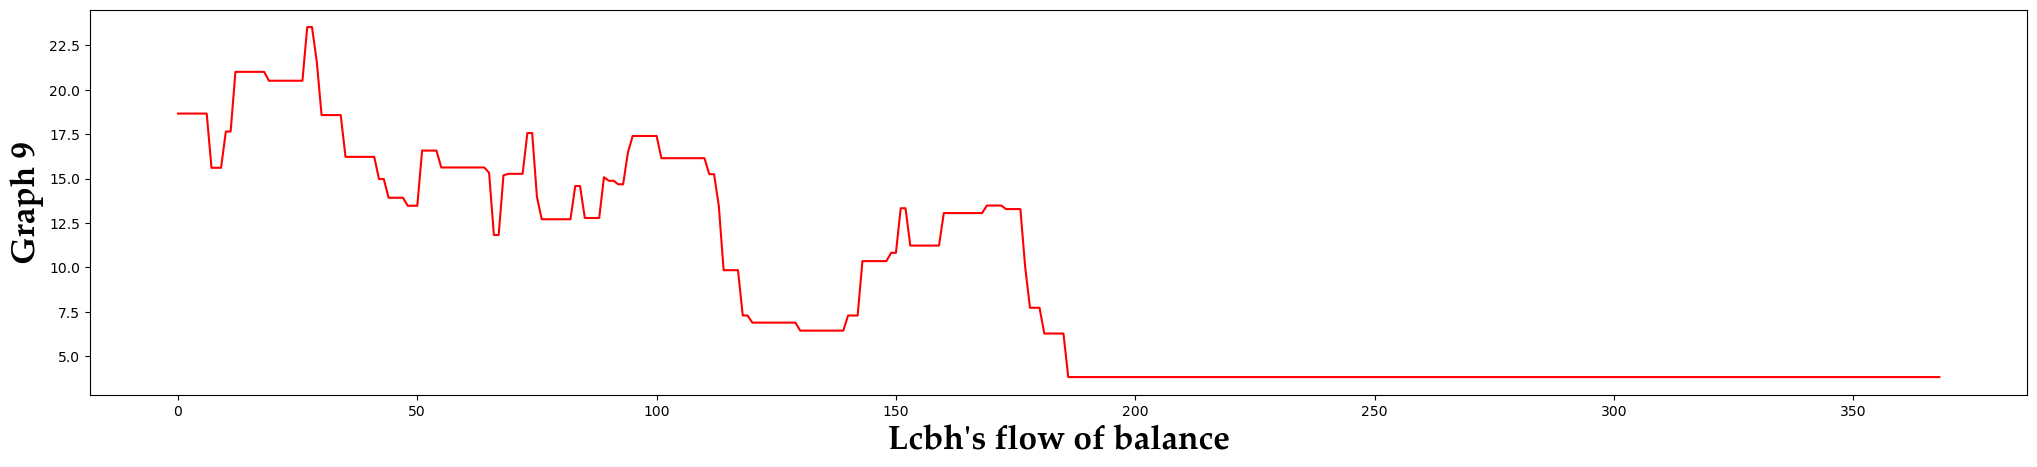

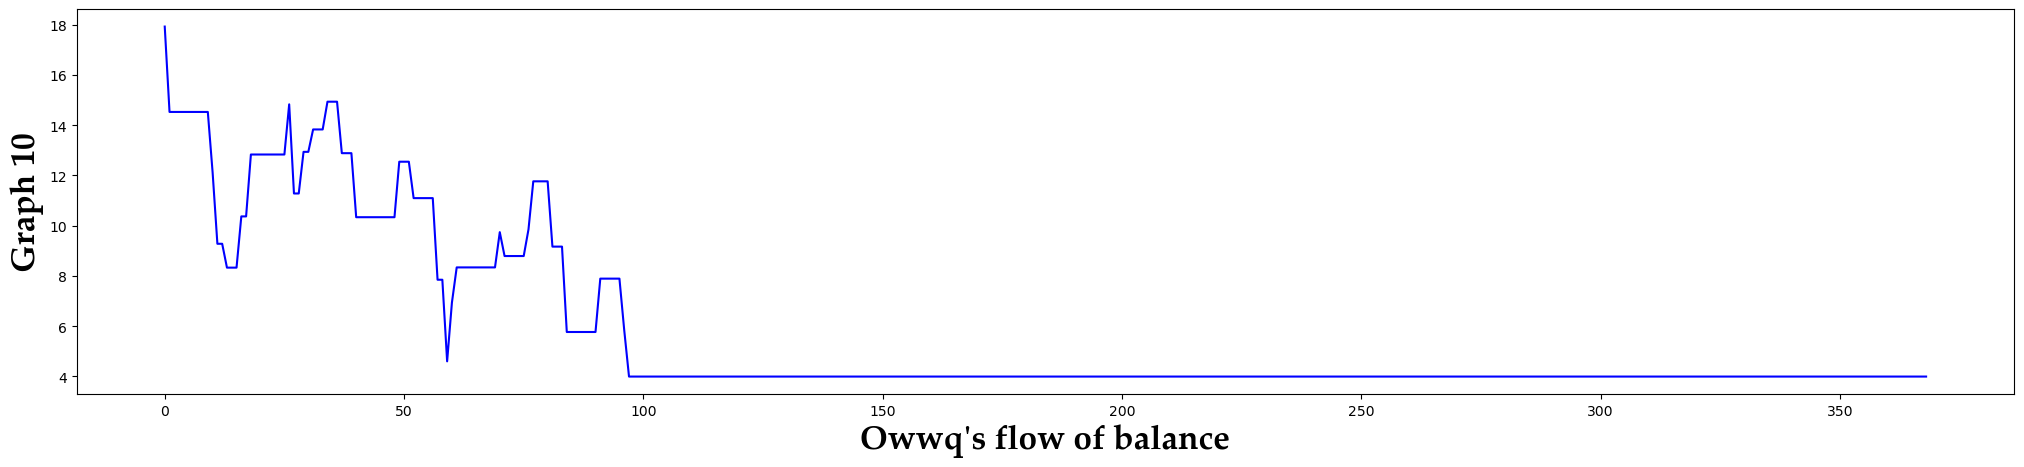

In [8]:
for i in range(number_of_players_in_pool):
    plt.figure(figsize=(25,5))
    matches_df.iloc[:,12+i].plot(kind='line', color= random.choice(['r','g','b','c','black','indigo','orange']))
    plt.xlabel(f"{col_names[12+i]}'s flow of balance", fontdict=font)
    plt.ylabel(f"Graph {i+1}", fontdict=font)
    plt.show()
    i += 1

Text(0, 0.5, 'Count')

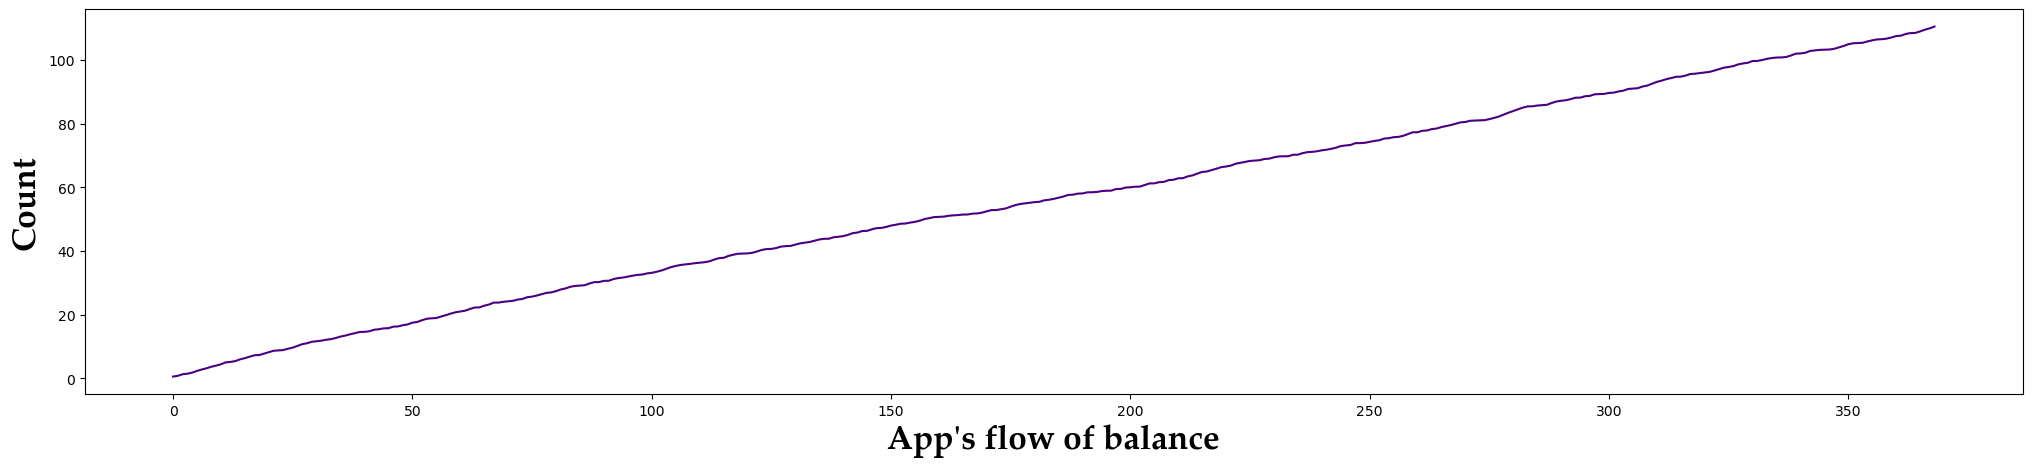

In [9]:
plt.figure(figsize=(25,5))
matches_df['Total Amount Earned by App'].plot(kind='line', color='indigo')
plt.xlabel("App's flow of balance", fontdict=font)
plt.ylabel("Count", fontdict=font)

### Linear Regression model preparation

In [10]:
predictor = matches_df.drop('Total Amount Earned by App', axis=1)

In [11]:
predictor

,Match Number,Player 1,Player 2,Loser,Winner,Points Lost by Loser,Amount Lost by Loser,Amount Remaining for Loser,Amount to be Credited to App,Amount Won by Winner,...,Ahdz,Hufo,Wyqv,Ypjc,Smhc,Zwdg,Jiub,Nljh,Lcbh,Owwq
0,1,Hufo,Owwq,Owwq,Hufo,68,3.40,14.529,0.510,2.890,...,25.932,14.419,15.783,30.808,26.246,33.258,5.286,19.124,18.654,17.929
1,2,Ahdz,Wyqv,Wyqv,Ahdz,32,1.60,14.183,0.240,1.360,...,25.932,17.309,15.783,30.808,26.246,33.258,5.286,19.124,18.654,14.529
2,3,Hufo,Ypjc,Ypjc,Hufo,67,3.35,27.458,0.502,2.848,...,27.292,17.309,14.183,30.808,26.246,33.258,5.286,19.124,18.654,14.529
3,4,Hufo,Ahdz,Ahdz,Hufo,21,1.05,26.242,0.158,0.892,...,27.292,20.157,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529
4,5,Smhc,Jiub,Jiub,Smhc,47,2.35,2.936,0.352,1.998,...,26.242,21.049,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,365,Ahdz,Hufo,Hufo,Ahdz,8,0.40,16.744,0.060,0.340,...,58.479,17.144,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
365,366,Hufo,Ahdz,Hufo,Ahdz,64,3.20,13.544,0.480,2.720,...,58.819,16.744,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
366,367,Hufo,Ahdz,Hufo,Ahdz,71,3.55,9.994,0.532,3.018,...,61.539,13.544,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
367,368,Ahdz,Hufo,Hufo,Ahdz,56,2.80,7.194,0.420,2.380,...,64.557,9.994,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991


In [12]:
target = pd.DataFrame(matches_df['Total Amount Earned by App'])
target

,Total Amount Earned by App
0,0.510
1,0.750
2,1.252
3,1.410
4,1.762
...,...
364,108.530
365,109.010
366,109.542
367,109.962


In [13]:
cat_cols = [col for col in predictor.columns.values if predictor[col].dtype == 'object']
predictor_cat = predictor[cat_cols]
predictor_cat

,Player 1,Player 2,Loser,Winner
0,Hufo,Owwq,Owwq,Hufo
1,Ahdz,Wyqv,Wyqv,Ahdz
2,Hufo,Ypjc,Ypjc,Hufo
3,Hufo,Ahdz,Ahdz,Hufo
4,Smhc,Jiub,Jiub,Smhc
...,...,...,...,...
364,Ahdz,Hufo,Hufo,Ahdz
365,Hufo,Ahdz,Hufo,Ahdz
366,Hufo,Ahdz,Hufo,Ahdz
367,Ahdz,Hufo,Hufo,Ahdz


In [14]:
cat_dummy = pd.get_dummies(predictor_cat, drop_first=True)
cat_dummy

,Player 1_Hufo,Player 1_Lcbh,Player 1_Nljh,Player 1_Owwq,Player 1_Smhc,Player 1_Wyqv,Player 1_Ypjc,Player 1_Zwdg,Player 2_Hufo,Player 2_Jiub,...,Loser_Wyqv,Loser_Ypjc,Loser_Zwdg,Winner_Hufo,Winner_Lcbh,Winner_Nljh,Winner_Owwq,Winner_Smhc,Winner_Ypjc,Winner_Zwdg
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
365,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
predictor_num = predictor.drop(cat_cols, axis=1)
predictor_num

,Match Number,Points Lost by Loser,Amount Lost by Loser,Amount Remaining for Loser,Amount to be Credited to App,Amount Won by Winner,Amount Remaining for Winner,Ahdz,Hufo,Wyqv,Ypjc,Smhc,Zwdg,Jiub,Nljh,Lcbh,Owwq
0,1,68,3.40,14.529,0.510,2.890,17.309,25.932,14.419,15.783,30.808,26.246,33.258,5.286,19.124,18.654,17.929
1,2,32,1.60,14.183,0.240,1.360,27.292,25.932,17.309,15.783,30.808,26.246,33.258,5.286,19.124,18.654,14.529
2,3,67,3.35,27.458,0.502,2.848,20.157,27.292,17.309,14.183,30.808,26.246,33.258,5.286,19.124,18.654,14.529
3,4,21,1.05,26.242,0.158,0.892,21.049,27.292,20.157,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529
4,5,47,2.35,2.936,0.352,1.998,28.244,26.242,21.049,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,365,8,0.40,16.744,0.060,0.340,58.819,58.479,17.144,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
365,366,64,3.20,13.544,0.480,2.720,61.539,58.819,16.744,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
366,367,71,3.55,9.994,0.532,3.018,64.557,61.539,13.544,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
367,368,56,2.80,7.194,0.420,2.380,66.937,64.557,9.994,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991


In [16]:
predictor_num['Match Number'] = predictor_num['Match Number'].astype('float64')
predictor_num['Points Lost by Loser'] = predictor_num['Points Lost by Loser'].astype('float64')

### Logarithmic Transformation to convert the target's unifrom distribution to a normal distribution

In [17]:
import numpy as np

target_log = np.log1p(target)

In [18]:
target_log

,Total Amount Earned by App
0,0.412110
1,0.559616
2,0.811819
3,0.879627
4,1.015955
...,...
364,4.696198
365,4.700571
366,4.705396
367,4.709188


<Axes: ylabel='Count'>

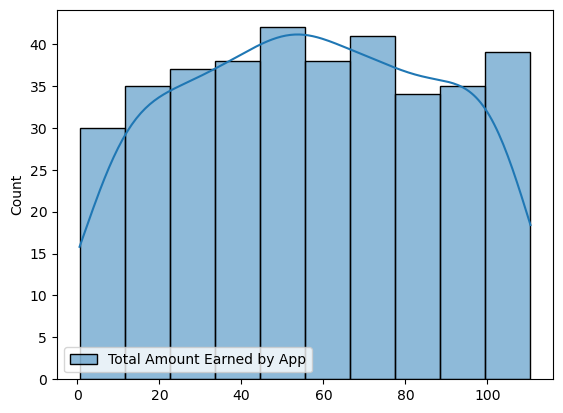

In [19]:
sns.histplot(target, kde=True)

<Axes: ylabel='Count'>

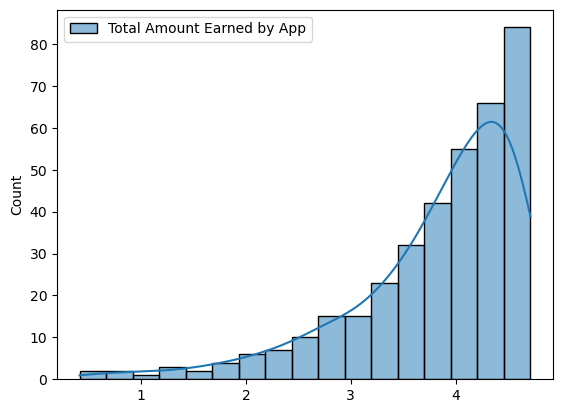

In [20]:
sns.histplot(target_log, kde=True)

In [21]:
cat_dummy.columns

Index(['Player 1_Hufo', 'Player 1_Lcbh', 'Player 1_Nljh', 'Player 1_Owwq',
       'Player 1_Smhc', 'Player 1_Wyqv', 'Player 1_Ypjc', 'Player 1_Zwdg',
       'Player 2_Hufo', 'Player 2_Jiub', 'Player 2_Lcbh', 'Player 2_Nljh',
       'Player 2_Owwq', 'Player 2_Smhc', 'Player 2_Wyqv', 'Player 2_Ypjc',
       'Player 2_Zwdg', 'Loser_Hufo', 'Loser_Jiub', 'Loser_Lcbh', 'Loser_Nljh',
       'Loser_Owwq', 'Loser_Smhc', 'Loser_Wyqv', 'Loser_Ypjc', 'Loser_Zwdg',
       'Winner_Hufo', 'Winner_Lcbh', 'Winner_Nljh', 'Winner_Owwq',
       'Winner_Smhc', 'Winner_Ypjc', 'Winner_Zwdg'],
      dtype='object')

In [22]:
predictor_new = pd.concat([cat_dummy, predictor_num], axis =1)
predictor_new

,Player 1_Hufo,Player 1_Lcbh,Player 1_Nljh,Player 1_Owwq,Player 1_Smhc,Player 1_Wyqv,Player 1_Ypjc,Player 1_Zwdg,Player 2_Hufo,Player 2_Jiub,...,Ahdz,Hufo,Wyqv,Ypjc,Smhc,Zwdg,Jiub,Nljh,Lcbh,Owwq
0,1,0,0,0,0,0,0,0,0,0,...,25.932,14.419,15.783,30.808,26.246,33.258,5.286,19.124,18.654,17.929
1,0,0,0,0,0,0,0,0,0,0,...,25.932,17.309,15.783,30.808,26.246,33.258,5.286,19.124,18.654,14.529
2,1,0,0,0,0,0,0,0,0,0,...,27.292,17.309,14.183,30.808,26.246,33.258,5.286,19.124,18.654,14.529
3,1,0,0,0,0,0,0,0,0,0,...,27.292,20.157,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529
4,0,0,0,0,1,0,0,0,0,1,...,26.242,21.049,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0,0,0,0,0,0,0,0,1,0,...,58.479,17.144,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
365,1,0,0,0,0,0,0,0,0,0,...,58.819,16.744,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
366,1,0,0,0,0,0,0,0,0,0,...,61.539,13.544,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991
367,0,0,0,0,0,0,0,0,1,0,...,64.557,9.994,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991


In [23]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(predictor_new.astype(float), target_log.astype(float), test_size=0.3, random_state=2024)

In [24]:
X_train.shape

(258, 50)

In [25]:
x_test.shape

(111, 50)

In [26]:
Y_train.shape

(258, 1)

In [27]:
y_test.shape

(111, 1)

In [28]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

model = lin.fit(X_train, Y_train)

In [29]:
import statsmodels.api as sm

#X_train = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_train).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Total Amount Earned by App   R-squared (uncentered):                   1.000
Model:                                    OLS   Adj. R-squared (uncentered):              1.000
Method:                         Least Squares   F-statistic:                          3.386e+04
Date:                        Fri, 17 May 2024   Prob (F-statistic):                        0.00
Time:                                07:26:37   Log-Likelihood:                          405.39
No. Observations:                         258   AIC:                                     -732.8
Df Residuals:                             219   BIC:                                     -594.2
Df Model:                                  39                                                  
Covariance Type:                    nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Player 1_Hufo                    0.0100      0.009      1.062      0.289      -0.009       0.029
Player 1_Lcbh                    0.0183      0.015      1.234      0.218      -0.011       0.048
Player 1_Nljh                    0.0326      0.019      1.693      0.092      -0.005       0.070
Player 1_Owwq                    0.0077      0.017      0.447      0.655      -0.026       0.042
Player 1_Smhc                    0.0056      0.010      0.559      0.577      -0.014       0.025
Player 1_Wyqv                    0.2168      0.046      4.695      0.000       0.126       0.308
Player 1_Ypjc                    0.0053      0.010      0.504      0.615      -0.015       0.026
Player 1_Zwdg                    0.0056      0.011      0.508      0.612      -0.016       0.027
Player 2_Hufo                   -0.0056      0.010     -0.566      0.572      -0.025       0.014
Player 2_Jiub                    0.0543      0.040      1.353      0.178      -0.025       0.134
Player 2_Lcbh                   -0.0082      0.014     -0.586      0.559      -0.036       0.019
Player 2_Nljh                   -0.0394      0.022     -1.802      0.073      -0.083       0.004
Player 2_Owwq                   -0.0348      0.020     -1.726      0.086      -0.075       0.005
Player 2_Smhc                    0.0063      0.009      0.704      0.482      -0.011       0.024
Player 2_Wyqv                   -0.0083      0.047     -0.178      0.859      -0.100       0.084
Player 2_Ypjc                -7.462e-05      0.011     -0.007      0.994      -0.021       0.021
Player 2_Zwdg                    0.0059      0.011      0.558      0.577      -0.015       0.027
Loser_Hufo                       0.0197      0.013      1.537      0.126      -0.006       0.045
Loser_Jiub                       0.0543      0.040      1.353      0.178      -0.025       0.134
Loser_Lcbh                    -3.56e-05      0.017     -0.002      0.998      -0.035       0.034
Loser_Nljh                       0.0441      0.023      1.892      0.060      -0.002       0.090
Loser_Owwq                       0.0402      0.023      1.746      0.082      -0.005       0.086
Loser_Smhc                       0.0194      0.013      1.455      0.147      -0.007       0.046
Loser_Wyqv                       0.2085      0.036      5.861      0.000       0.138       0.279
Loser_Ypjc                       0.0064      0.012      0.525      0.600      -0.018       0.030
Loser_Zwdg                       0.0128      0.013      0.953      0.341      -0.014       0.039
Winner_Hufo                     -0.0153      0.013     -1.195      0.233      -0.04

In [31]:
y_pred = model.predict(x_test)

In [32]:
y_pred

326    4.580791
104    3.588450
257    4.362557
259    4.355613
196    4.126971
         ...   
180    4.011138
2      0.920124
32     2.671921
282    4.444560
208    4.180001
Length: 111, dtype: float64

In [33]:
pd.set_option('display.max_rows',150)

In [34]:
matches_df.isnull().sum().head(112)

Match Number                    0
Player 1                        0
Player 2                        0
Loser                           0
Winner                          0
Points Lost by Loser            0
Amount Lost by Loser            0
Amount Remaining for Loser      0
Amount to be Credited to App    0
Total Amount Earned by App      0
Amount Won by Winner            0
Amount Remaining for Winner     0
Ahdz                            0
Hufo                            0
Wyqv                            0
Ypjc                            0
Smhc                            0
Zwdg                            0
Jiub                            0
Nljh                            0
Lcbh                            0
Owwq                            0
dtype: int64

In [35]:
new = pd.concat([predictor_num,target], axis=1)

In [36]:
new

,Match Number,Points Lost by Loser,Amount Lost by Loser,Amount Remaining for Loser,Amount to be Credited to App,Amount Won by Winner,Amount Remaining for Winner,Ahdz,Hufo,Wyqv,Ypjc,Smhc,Zwdg,Jiub,Nljh,Lcbh,Owwq,Total Amount Earned by App
0,1.0,68.0,3.40,14.529,0.510,2.890,17.309,25.932,14.419,15.783,30.808,26.246,33.258,5.286,19.124,18.654,17.929,0.510
1,2.0,32.0,1.60,14.183,0.240,1.360,27.292,25.932,17.309,15.783,30.808,26.246,33.258,5.286,19.124,18.654,14.529,0.750
2,3.0,67.0,3.35,27.458,0.502,2.848,20.157,27.292,17.309,14.183,30.808,26.246,33.258,5.286,19.124,18.654,14.529,1.252
3,4.0,21.0,1.05,26.242,0.158,0.892,21.049,27.292,20.157,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529,1.410
4,5.0,47.0,2.35,2.936,0.352,1.998,28.244,26.242,21.049,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529,1.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,365.0,8.0,0.40,16.744,0.060,0.340,58.819,58.479,17.144,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,108.530
365,366.0,64.0,3.20,13.544,0.480,2.720,61.539,58.819,16.744,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,109.010
366,367.0,71.0,3.55,9.994,0.532,3.018,64.557,61.539,13.544,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,109.542
367,368.0,56.0,2.80,7.194,0.420,2.380,66.937,64.557,9.994,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,109.962


In [37]:
new.columns

Index(['Match Number', 'Points Lost by Loser', 'Amount Lost by Loser',
       'Amount Remaining for Loser', 'Amount to be Credited to App',
       'Amount Won by Winner', 'Amount Remaining for Winner', 'Ahdz', 'Hufo',
       'Wyqv', 'Ypjc', 'Smhc', 'Zwdg', 'Jiub', 'Nljh', 'Lcbh', 'Owwq',
       'Total Amount Earned by App'],
      dtype='object')

In [38]:
new_1 = new.iloc[:,7:]

In [39]:
new_1

,Ahdz,Hufo,Wyqv,Ypjc,Smhc,Zwdg,Jiub,Nljh,Lcbh,Owwq,Total Amount Earned by App
0,25.932,14.419,15.783,30.808,26.246,33.258,5.286,19.124,18.654,17.929,0.510
1,25.932,17.309,15.783,30.808,26.246,33.258,5.286,19.124,18.654,14.529,0.750
2,27.292,17.309,14.183,30.808,26.246,33.258,5.286,19.124,18.654,14.529,1.252
3,27.292,20.157,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529,1.410
4,26.242,21.049,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529,1.762
...,...,...,...,...,...,...,...,...,...,...,...
364,58.479,17.144,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,108.530
365,58.819,16.744,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,109.010
366,61.539,13.544,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,109.542
367,64.557,9.994,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,109.962


In [40]:
for col in new_1.columns.values:
    new_1[f'{col} loss'] = new_1[col].diff()

In [41]:
new_1

,Ahdz,Hufo,Wyqv,Ypjc,Smhc,Zwdg,Jiub,Nljh,Lcbh,Owwq,...,Hufo loss,Wyqv loss,Ypjc loss,Smhc loss,Zwdg loss,Jiub loss,Nljh loss,Lcbh loss,Owwq loss,Total Amount Earned by App loss
0,25.932,14.419,15.783,30.808,26.246,33.258,5.286,19.124,18.654,17.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.932,17.309,15.783,30.808,26.246,33.258,5.286,19.124,18.654,14.529,...,2.890,0.0,0.00,0.0,0.0,0.0,0.0,0.0,-3.4,0.240
2,27.292,17.309,14.183,30.808,26.246,33.258,5.286,19.124,18.654,14.529,...,0.000,-1.6,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.502
3,27.292,20.157,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529,...,2.848,0.0,-3.35,0.0,0.0,0.0,0.0,0.0,0.0,0.158
4,26.242,21.049,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529,...,0.892,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,58.479,17.144,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,...,-1.750,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.060
365,58.819,16.744,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,...,-0.400,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.480
366,61.539,13.544,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,...,-3.200,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.532
367,64.557,9.994,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,...,-3.550,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.420


#### Handling missing values

In [42]:
new_1.isnull().sum()

Ahdz                               0
Hufo                               0
Wyqv                               0
Ypjc                               0
Smhc                               0
Zwdg                               0
Jiub                               0
Nljh                               0
Lcbh                               0
Owwq                               0
Total Amount Earned by App         0
Ahdz loss                          1
Hufo loss                          1
Wyqv loss                          1
Ypjc loss                          1
Smhc loss                          1
Zwdg loss                          1
Jiub loss                          1
Nljh loss                          1
Lcbh loss                          1
Owwq loss                          1
Total Amount Earned by App loss    1
dtype: int64

In [43]:
new_1[new_1.columns[4:]] = new_1[new_1.columns[4:]].fillna(0)

In [44]:
new_1

,Ahdz,Hufo,Wyqv,Ypjc,Smhc,Zwdg,Jiub,Nljh,Lcbh,Owwq,...,Hufo loss,Wyqv loss,Ypjc loss,Smhc loss,Zwdg loss,Jiub loss,Nljh loss,Lcbh loss,Owwq loss,Total Amount Earned by App loss
0,25.932,14.419,15.783,30.808,26.246,33.258,5.286,19.124,18.654,17.929,...,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,25.932,17.309,15.783,30.808,26.246,33.258,5.286,19.124,18.654,14.529,...,2.890,0.0,0.00,0.0,0.0,0.0,0.0,0.0,-3.4,0.240
2,27.292,17.309,14.183,30.808,26.246,33.258,5.286,19.124,18.654,14.529,...,0.000,-1.6,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.502
3,27.292,20.157,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529,...,2.848,0.0,-3.35,0.0,0.0,0.0,0.0,0.0,0.0,0.158
4,26.242,21.049,14.183,27.458,26.246,33.258,5.286,19.124,18.654,14.529,...,0.892,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,58.479,17.144,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,...,-1.750,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.060
365,58.819,16.744,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,...,-0.400,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.480
366,61.539,13.544,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,...,-3.200,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.532
367,64.557,9.994,1.583,2.717,2.175,2.134,2.936,3.979,3.831,3.991,...,-3.550,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.420


In [45]:
# plt.figure(figsize=(10,5))
# sns.heatmap(new_1.corr(), annot=True, cmap='coolwarm')

#Uncomment the above code and run it only when the number of players are small i.e 10 and below as it would take a long time to generate and a heatmap is not a good idea when having large number of variables/features in the dataset

In [46]:
new = new.drop(['Match Number', 'Points Lost by Loser', 'Amount Lost by Loser','Amount Remaining for Loser', 'Amount Won by Winner', 'Amount Remaining for Winner'], axis=1)

In [47]:
# plt.figure(figsize=(15,10))
# sns.heatmap(new.corr(numeric_only=True), annot=True, fmt='0.2g', cmap='viridis', cbar=True, square=True)

#Uncomment the above code and run it only when the number of players are small i.e 10 and below

Text(0, 0.5, 'App')

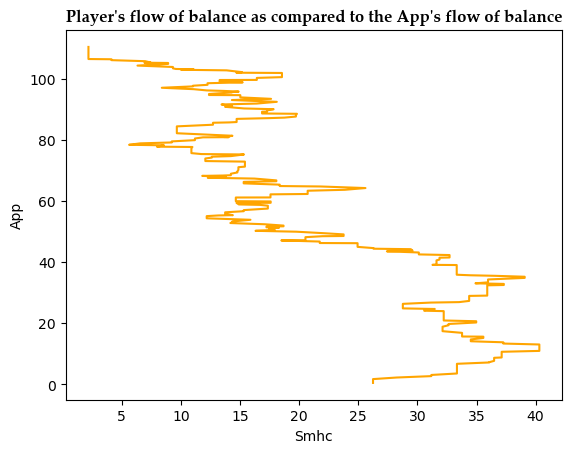

In [48]:
font1 = {'size':12, 'family':'Palatino Linotype', 'weight':'bold'}
matches_df.plot(x=random.choice(matches_df.columns.values[12:]), legend=False, y='Total Amount Earned by App', kind='line',  color=random.choice(['r','g','b','yellow','black','orange','indigo']))
plt.title("Player's flow of balance as compared to the App's flow of balance", fontdict=font1)
plt.ylabel("App")

#Change value from 12 to any greater int value within the length of columns.values to get similar visualizations for other players

In [49]:
df = pd.read_csv(r"D:\DSP and ML files\CSV\Rummy 4 Player 0.5.csv")
#Save the csv file in local storage and access it in the above code

In [50]:
df.head()

,Match Number,Total Amount Earned by App,Losing Players Balance 1,Losing Players Balance 2,Losing Players Balance 3,Winning Player Balance,Amount to be Credited to App
0,86,29.642,5.412,3.554,2.172,21.407,0.570
1,96,30.625,5.921,1.342,3.706,37.562,0.360
2,193,59.883,3.507,2.485,1.424,31.038,0.382
3,145,42.600,2.030,2.736,6.647,38.266,0.412
4,190,59.261,3.930,5.232,5.442,19.106,0.495


In [51]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Match Number,55.0,112.272727,50.046443,16.000,74.0000,111.000,152.5000,207.000
Total Amount Earned by App,55.0,34.199164,15.055405,4.905,22.7765,35.084,44.3080,65.040
Losing Players Balance 1,55.0,4.013018,1.590804,0.562,2.9155,3.635,5.2255,7.308
Losing Players Balance 2,55.0,3.768982,1.842975,0.851,2.4505,3.554,4.7860,7.626
Losing Players Balance 3,55.0,3.514891,1.703922,0.597,2.1755,3.487,4.4580,7.487
Winning Player Balance,55.0,33.897400,9.613877,18.697,26.1080,34.789,39.0185,65.902
Amount to be Credited to App,55.0,0.404364,0.146301,0.022,0.2960,0.412,0.5470,0.593


<Axes: >

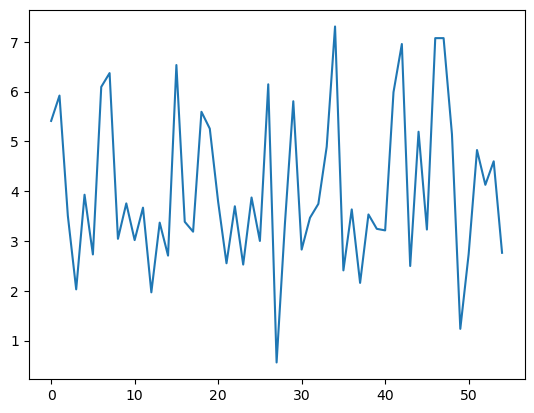

In [52]:
df['Losing Players Balance 1'].plot(kind='line')

In [53]:
df['Total Money Involved in each pool'] = df[['Losing Players Balance 1', 'Losing Players Balance 2', 'Losing Players Balance 3', 'Winning Player Balance', 'Total Amount Earned by App']].sum(axis=1)

In [54]:
df.head()

,Match Number,Total Amount Earned by App,Losing Players Balance 1,Losing Players Balance 2,Losing Players Balance 3,Winning Player Balance,Amount to be Credited to App,Total Money Involved in each pool
0,86,29.642,5.412,3.554,2.172,21.407,0.570,62.187
1,96,30.625,5.921,1.342,3.706,37.562,0.360,79.156
2,193,59.883,3.507,2.485,1.424,31.038,0.382,98.337
3,145,42.600,2.030,2.736,6.647,38.266,0.412,92.279
4,190,59.261,3.930,5.232,5.442,19.106,0.495,92.971


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(<seaborn.axisgrid.FacetGrid at 0x1f420741710>,
 <seaborn.axisgrid.FacetGrid at 0x1f4252d4450>)

<Figure size 500x500 with 0 Axes>

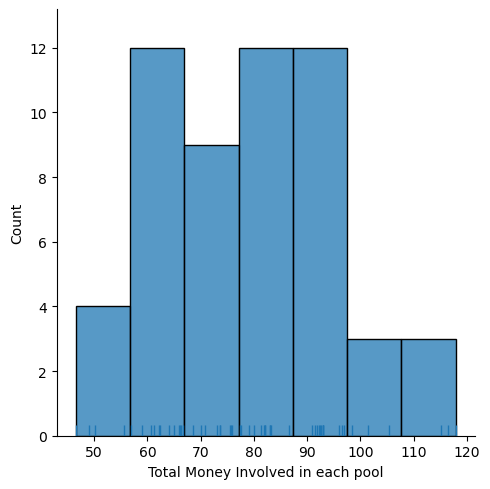

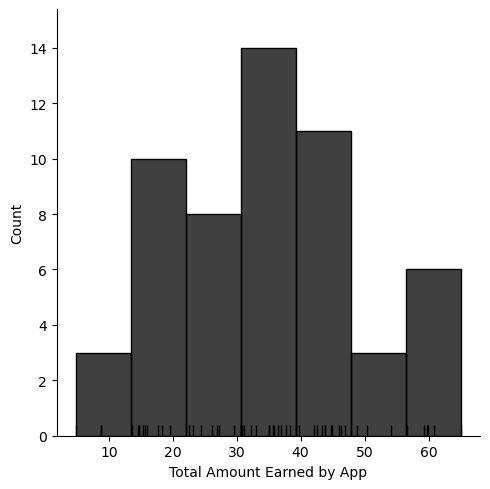

In [55]:
plt.figure(figsize=(5,5))

sns.displot(data=df, x='Total Money Involved in each pool',rug=True), sns.displot(data=df, x='Total Amount Earned by App', color='black', rug=True)

In [56]:
%store matches_df

Stored 'matches_df' (DataFrame)


In [57]:
%store number_of_players_in_pool

Stored 'number_of_players_in_pool' (int)


In [58]:
%store totalPlayers

Stored 'totalPlayers' (dict)


In [59]:
players = list(totalPlayers.keys())
players.append('Total Amount Earned by App')

In [60]:
players

['Ahdz',
 'Hufo',
 'Wyqv',
 'Ypjc',
 'Smhc',
 'Zwdg',
 'Jiub',
 'Nljh',
 'Lcbh',
 'Owwq',
 'Total Amount Earned by App']